In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [2]:
n_pts = 100
centers = [[-0.5, 0.5],[0.5,-0.5]]
X,y=datasets.make_blobs(n_samples=n_pts, random_state=123, centers = centers, cluster_std=0.4)
print(X[:10])
print(y[:10])

[[-0.13715792 -0.07147228]
 [ 0.80437976 -0.37061246]
 [-0.60224775 -0.61943564]
 [ 0.57087693 -0.5119872 ]
 [ 0.0063745   0.15330384]
 [-0.87433355  0.97033162]
 [ 0.19742512 -0.37132537]
 [-0.6340043   0.91244578]
 [-0.48180397  0.40676318]
 [ 0.19748489  0.18077491]]
[0 1 0 1 0 0 1 0 0 0]


In [4]:
def plot_scatter(X,y):
    plt.scatter(X[y==0,0], X[y==0,1])
    plt.scatter(X[y==1,0], X[y==1,1])
    plt.legend(y)

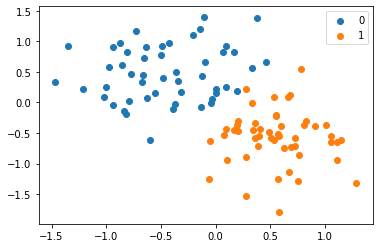

In [5]:
plot_scatter(X,y)

In [6]:
dataX = torch.Tensor(X)
dataY = torch.Tensor(y.reshape(100,1))#reshape due to warning when running gradien descent

In [7]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))
    
    def predict(self, X):
        pred = self.forward(X)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [8]:
torch.manual_seed(2)
model = Model(2,1)
print(list(model.parameters()))

[w,b] = list(model.parameters())

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [9]:
 w.view(2)[1].item()

-0.1682732105255127

In [10]:
def plot_fit(title, model):
    [w,b] = list(model.parameters())
    w1, w2, b1 = w[0][0].item(), w[0][1].item(), b[0].item()
    x1 = np.array([-2.0,2.0]) #range of the x-axis, which goes from -2 to 2 here, basically we are predicting two points, which then will be connected to form our predition line.
    x2 = (w1*x1+b1)/-w2
    plt.title=title
    plot_scatter(X,y)
    plt.plot(x1,x2,'r')

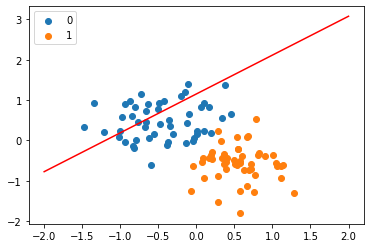

In [11]:
plot_fit('initial model', model)

In [12]:
loss_func = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [13]:
losses=[]
epochs = 2000

In [14]:
for i in range(epochs):
    y_pred = model.forward(dataX)
    loss = loss_func(y_pred,dataY)
    if i%100==0:
        print("epochs: ", i, "loss: ", loss.item())
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epochs:  0 loss:  0.6185115575790405
epochs:  100 loss:  0.5289824604988098
epochs:  200 loss:  0.46342259645462036
epochs:  300 loss:  0.41410133242607117
epochs:  400 loss:  0.3759410083293915
epochs:  500 loss:  0.34564027190208435
epochs:  600 loss:  0.32102492451667786
epochs:  700 loss:  0.30063068866729736
epochs:  800 loss:  0.28344565629959106
epochs:  900 loss:  0.26875317096710205
epochs:  1000 loss:  0.25603345036506653
epochs:  1100 loss:  0.24490125477313995
epochs:  1200 loss:  0.23506595194339752
epochs:  1300 loss:  0.22630345821380615
epochs:  1400 loss:  0.21843940019607544
epochs:  1500 loss:  0.21133512258529663
epochs:  1600 loss:  0.2048797756433487
epochs:  1700 loss:  0.19898317754268646
epochs:  1800 loss:  0.1935713142156601
epochs:  1900 loss:  0.1885829120874405


Text(0, 0.5, 'loss')

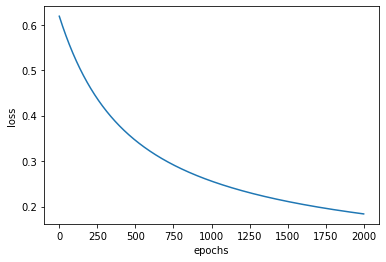

In [15]:
plt.plot(range(epochs), losses)
plt.xlabel("epochs")
plt.ylabel('loss')

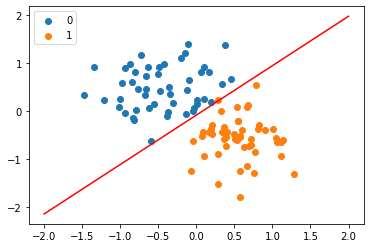

In [16]:
plot_fit("final model", model)

 Model testing

black point probability: 0.979621171951294, it is in class 1
red point probability: 0.01458801981061697, it is in class 0


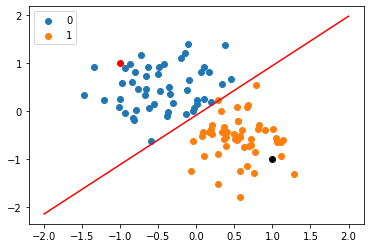

In [27]:
p1 = torch.Tensor([1.0,-1.0])
p2 = torch.Tensor([-1.0,1.0])
plot_fit("final model", model)
plt.plot(p1.numpy()[0], p1.numpy()[1], 'ko')
plt.plot(p2.numpy()[0], p2.numpy()[1], 'ro')
print("black point probability: {}, it is in class {}".format(model.forward(p1).item(), model.predict(p1)))
print("red point probability: {}, it is in class {}".format(model.forward(p2).item(), model.predict(p2)))
